In [37]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import h5py
import pickle

In [82]:
higgs_file = open ("higgs_100000_pt_250_500.pkl", 'rb')
qcd_file = open ("qcd_100000_pt_250_500.pkl", 'rb')

# QCD is background, Higgs is signal
qcd = pickle.load(qcd_file)
higgs = pickle.load(higgs_file)


print("pt = Transverse Momentum")
print("eta = Pseudo Rapidity")
print("phi = Azimuthal Angle")
print("mass = Mass")
print("ee2 = Energy Correlation Function 2")
print("ee3 = Energy Correlation Function 3")
print("d2 = Energy Correlation Function")
print("angularity = Jet broadness to thrust ratio")
print("t1 = subjettiness of degree 1")
print("t2 = subjettiness of degree 2") 
print("t3 = subjettiness of degree 3")
print("t21 = ratio of t2/t1")
print("t32 = ratio of t3/t2")
print("KtDeltaR = Delta R of two subjets within large-R jet")

pt = Transverse Momentum
eta = Pseudo Rapidity
phi = Azimuthal Angle
mass = Mass
ee2 = Energy Correlation Function 2
ee3 = Energy Correlation Function 3
d2 = Energy Correlation Function
angularity = Jet broadness to thrust ratio
t1 = subjettiness of degree 1
t2 = subjettiness of degree 2
t3 = subjettiness of degree 3
t21 = ratio of t2/t1
t32 = ratio of t3/t2
KtDeltaR = Delta R of two subjets within large-R jet


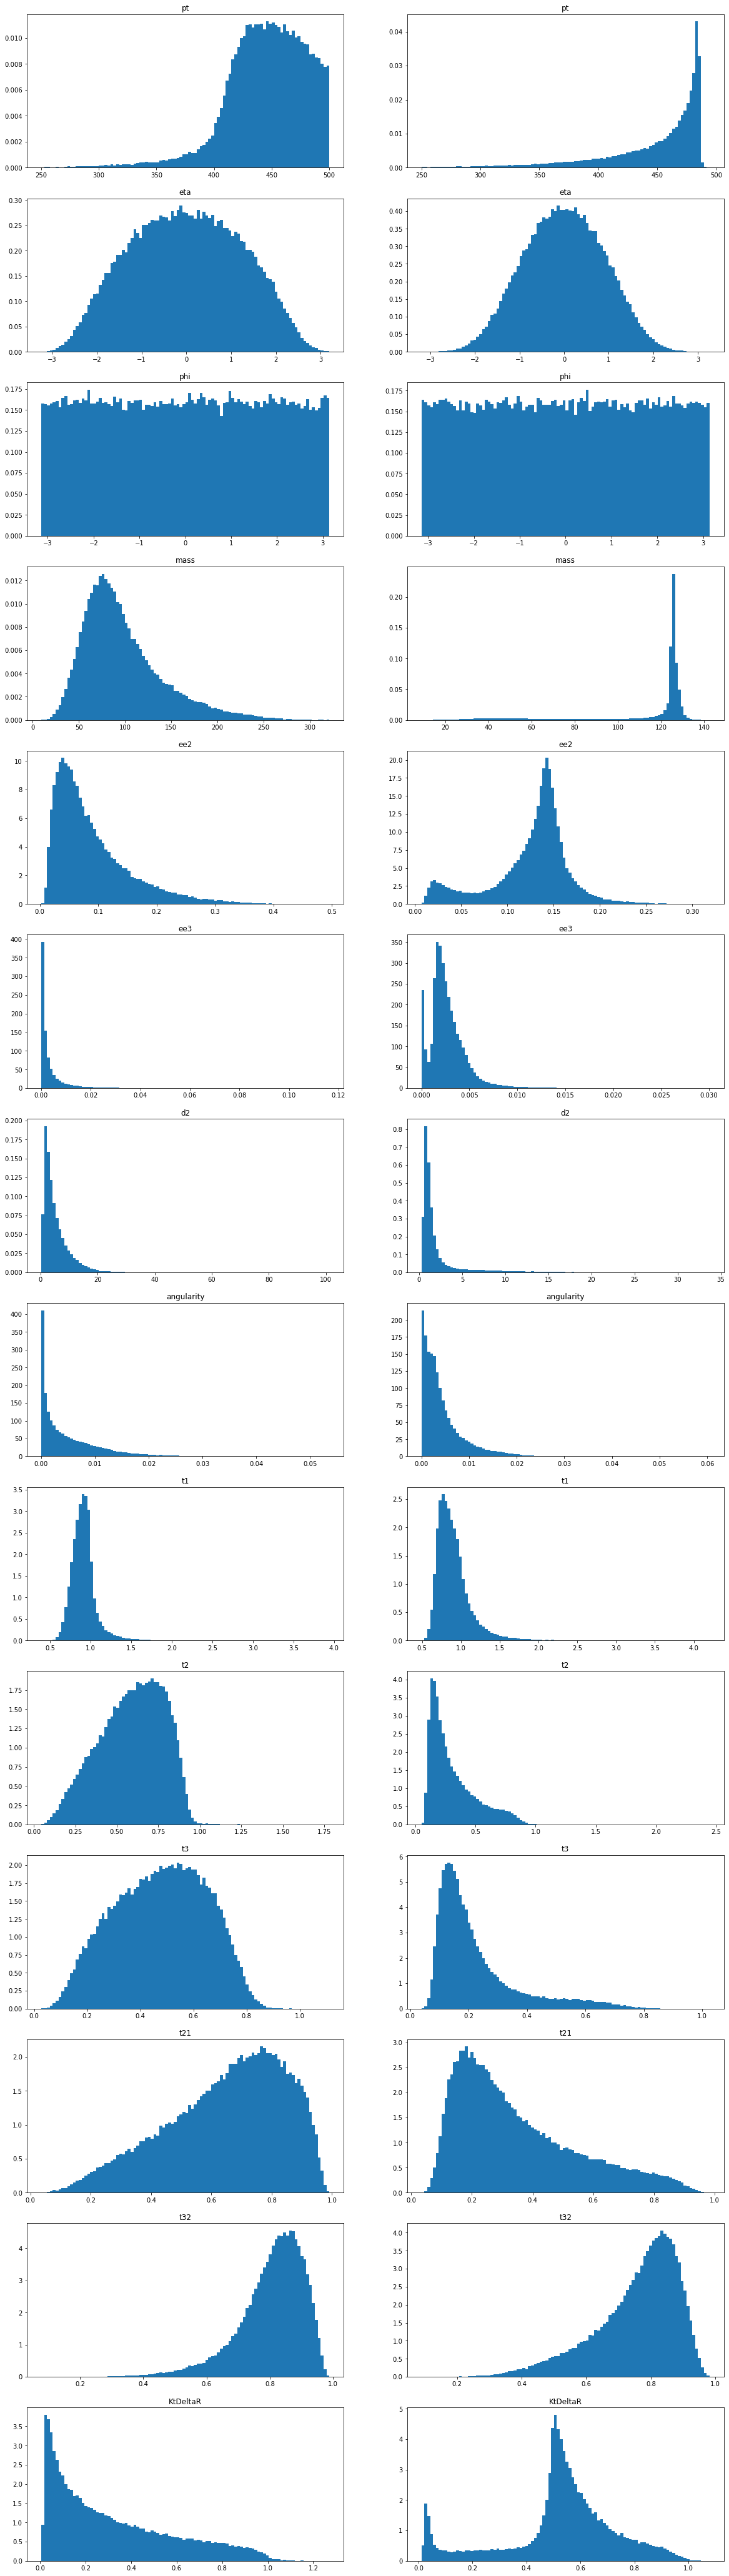

In [113]:
fig, ax = plt.subplots(14, 2, figsize = (20,75))

i = 0
for key in qcd:
    ax[i, 0].hist(qcd[key], density = True, bins = 100)
    ax[i, 0].set_title(key)
    i += 1

i = 0
for key in higgs:
    ax[i, 1].hist(higgs[key], density = True, bins = 100)
    ax[i, 1].set_title(key)
    i = i + 1

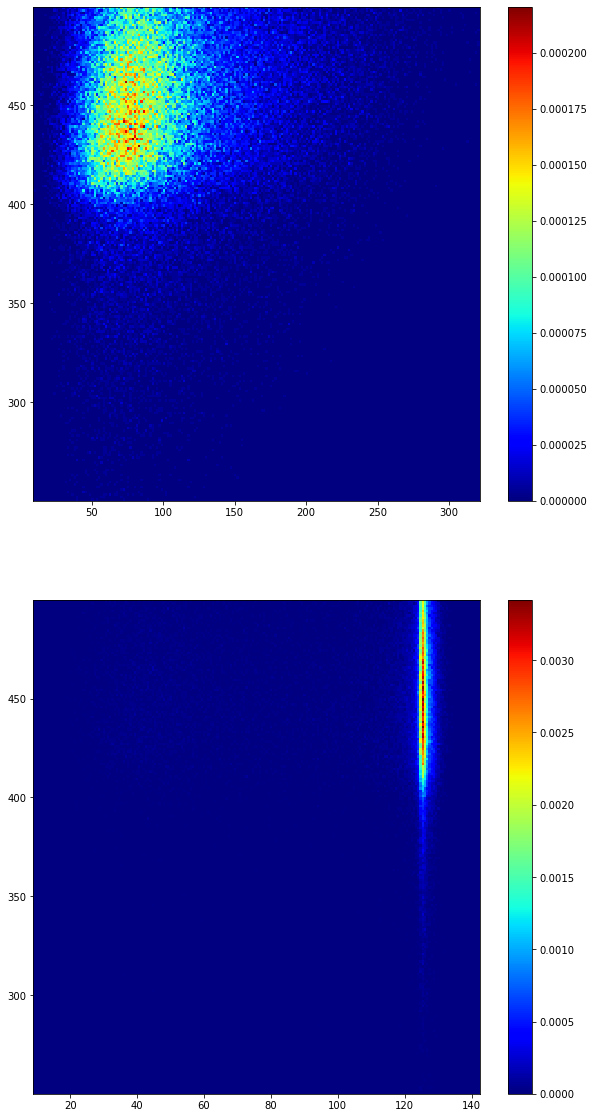

In [61]:
fig, ax = plt.subplots(2, 1, figsize = (10, 20))

p1 = ax[0].hist2d(qcd["mass"], qcd["pt"], bins = 200, density = True, cmap = 'jet')
p2 = ax[1].hist2d(higgs["mass"], qcd["pt"], bins = 200, density = True, cmap = 'jet')

fig.colorbar(p1[3], ax = ax[0])
fig.colorbar(p2[3], ax = ax[1])
plt.show()

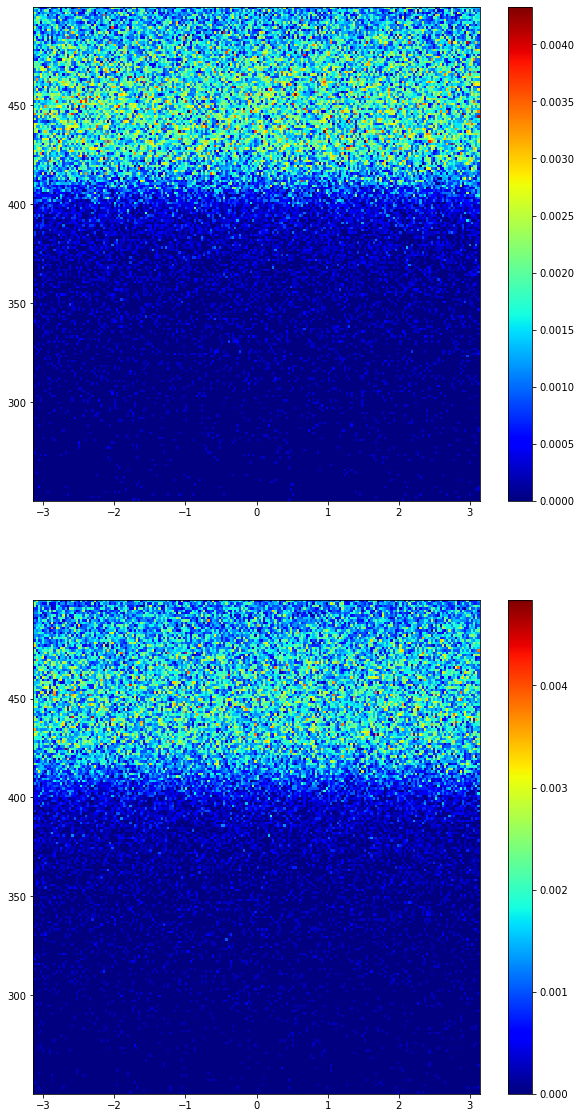

In [63]:
fig, ax = plt.subplots(2, 1, figsize = (10, 20))

p3 = ax[0].hist2d(qcd["phi"], qcd["pt"], bins = 200, density = True, cmap = 'jet')
p4 = ax[1].hist2d(higgs["phi"], qcd["pt"], bins = 200, density = True, cmap = 'jet')

fig.colorbar(p3[3], ax = ax[0])
fig.colorbar(p4[3], ax = ax[1])
plt.show()

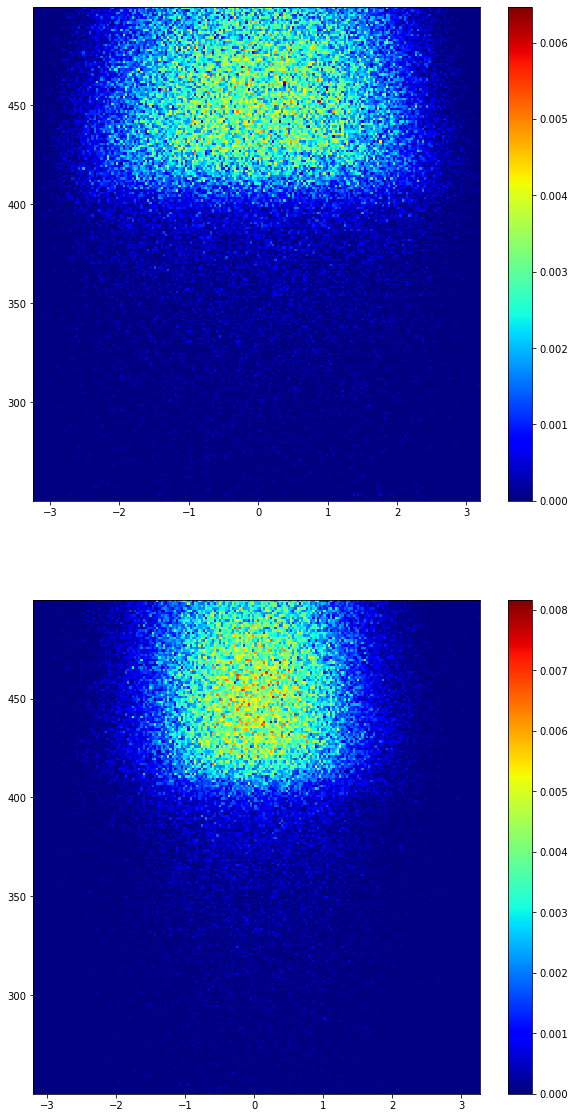

In [64]:
fig, ax = plt.subplots(2, 1, figsize = (10, 20))

p5 = ax[0].hist2d(qcd["eta"], qcd["pt"], bins = 200, density = True, cmap = 'jet')
p6 = ax[1].hist2d(higgs["eta"], qcd["pt"], bins = 200, density = True, cmap = 'jet')

fig.colorbar(p5[3], ax = ax[0])
fig.colorbar(p6[3], ax = ax[1])
plt.show()

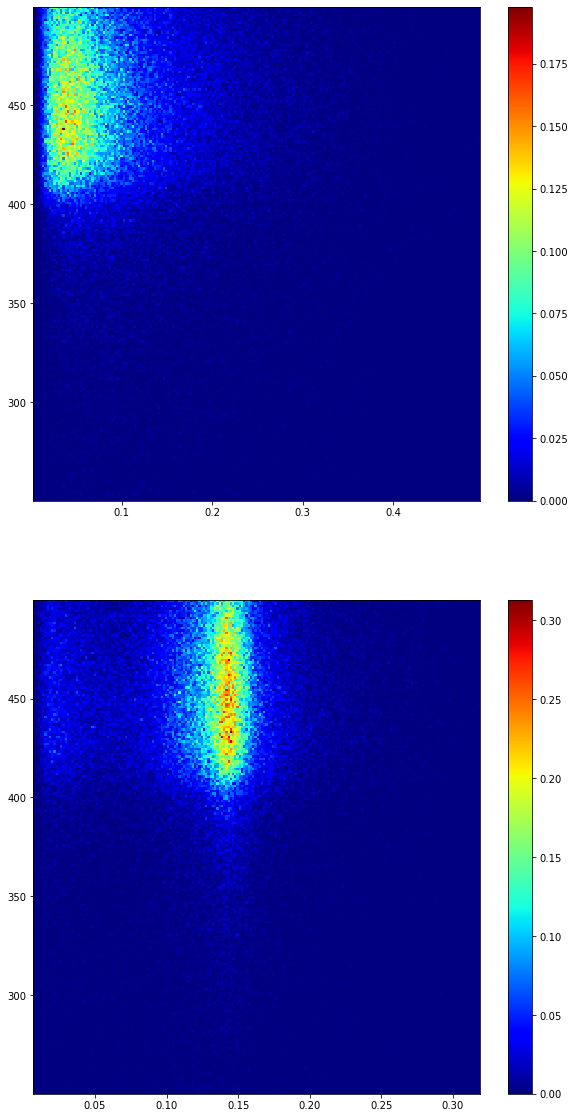

In [65]:
fig, ax = plt.subplots(2, 1, figsize = (10, 20))

p7 = ax[0].hist2d(qcd["ee2"], qcd["pt"], bins = 200, density = True, cmap = 'jet')
p8 = ax[1].hist2d(higgs["ee2"], qcd["pt"], bins = 200, density = True, cmap = 'jet')

fig.colorbar(p7[3], ax = ax[0])
fig.colorbar(p8[3], ax = ax[1])
plt.show()

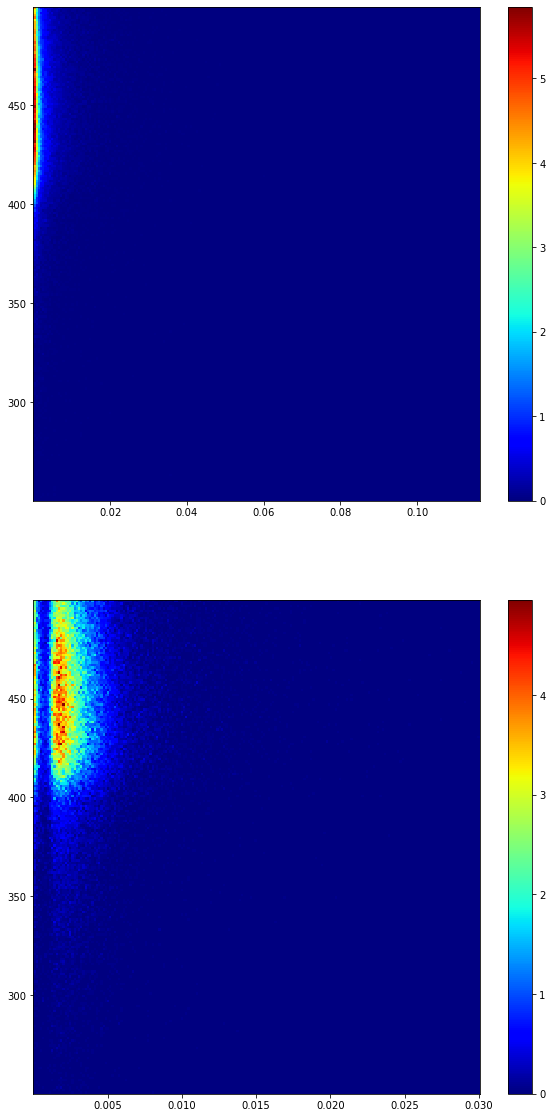

In [72]:
fig, ax = plt.subplots(2, 1, figsize = (10, 20))

p9 = ax[0].hist2d(qcd["ee3"], qcd["pt"], bins = 200, density = True, cmap = 'jet')
p10 = ax[1].hist2d(higgs["ee3"], qcd["pt"], bins = 200, density = True, cmap = 'jet')

fig.colorbar(p9[3], ax = ax[0])
fig.colorbar(p10[3], ax = ax[1])
plt.show()

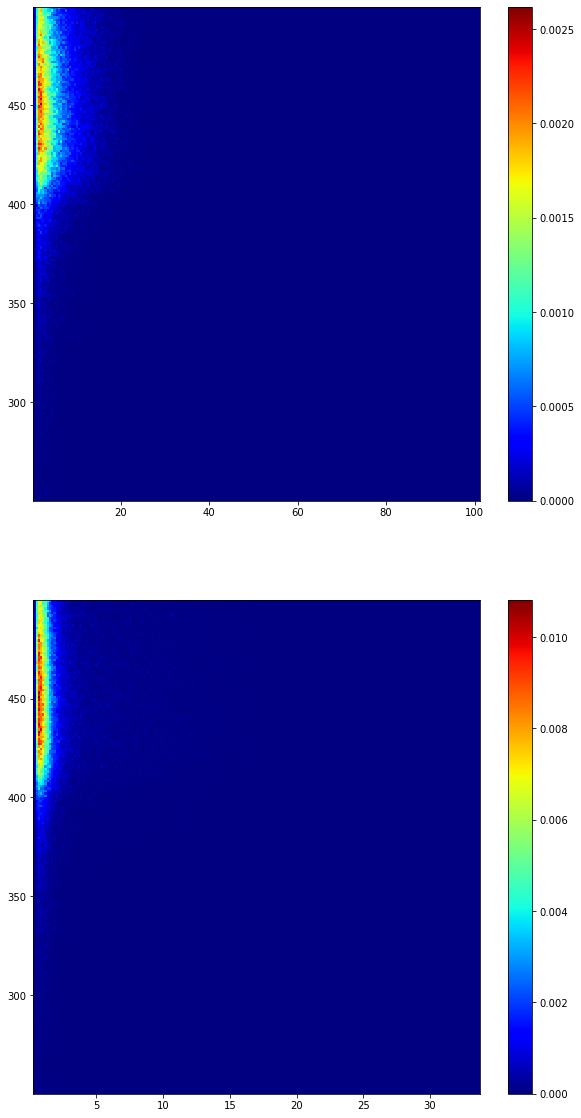

In [73]:
fig, ax = plt.subplots(2, 1, figsize = (10, 20))

p11 = ax[0].hist2d(qcd["d2"], qcd["pt"], bins = 200, density = True, cmap = 'jet')
p12 = ax[1].hist2d(higgs["d2"], qcd["pt"], bins = 200, density = True, cmap = 'jet')

fig.colorbar(p11[3], ax = ax[0])
fig.colorbar(p12[3], ax = ax[1])
plt.show()

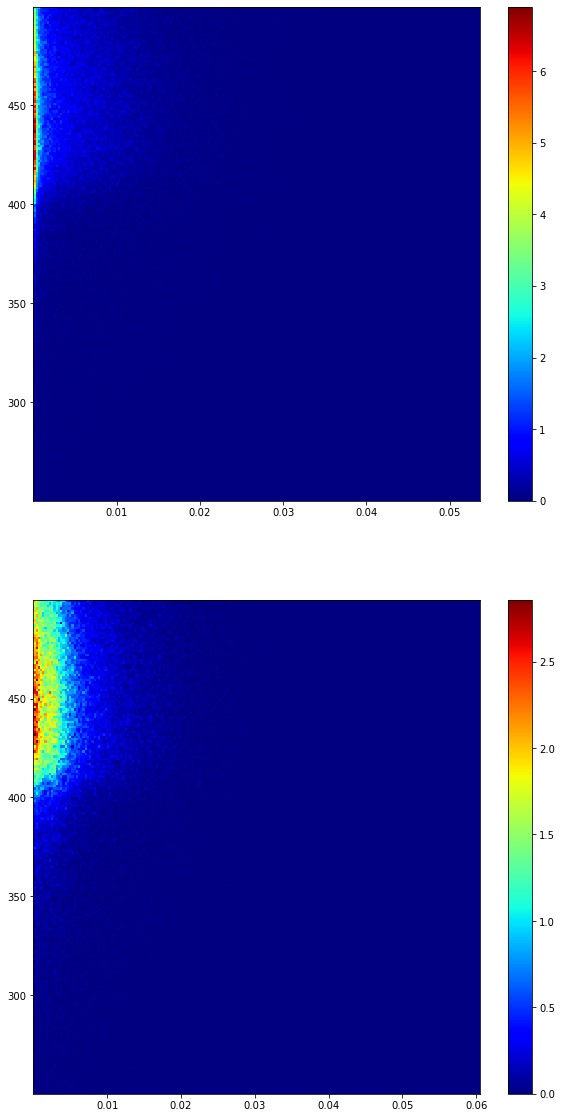

In [74]:
fig, ax = plt.subplots(2, 1, figsize = (10, 20))

p13 = ax[0].hist2d(qcd["angularity"], qcd["pt"], bins = 200, density = True, cmap = 'jet')
p14 = ax[1].hist2d(higgs["angularity"], qcd["pt"], bins = 200, density = True, cmap = 'jet')

fig.colorbar(p13[3], ax = ax[0])
fig.colorbar(p14[3], ax = ax[1])
plt.show()

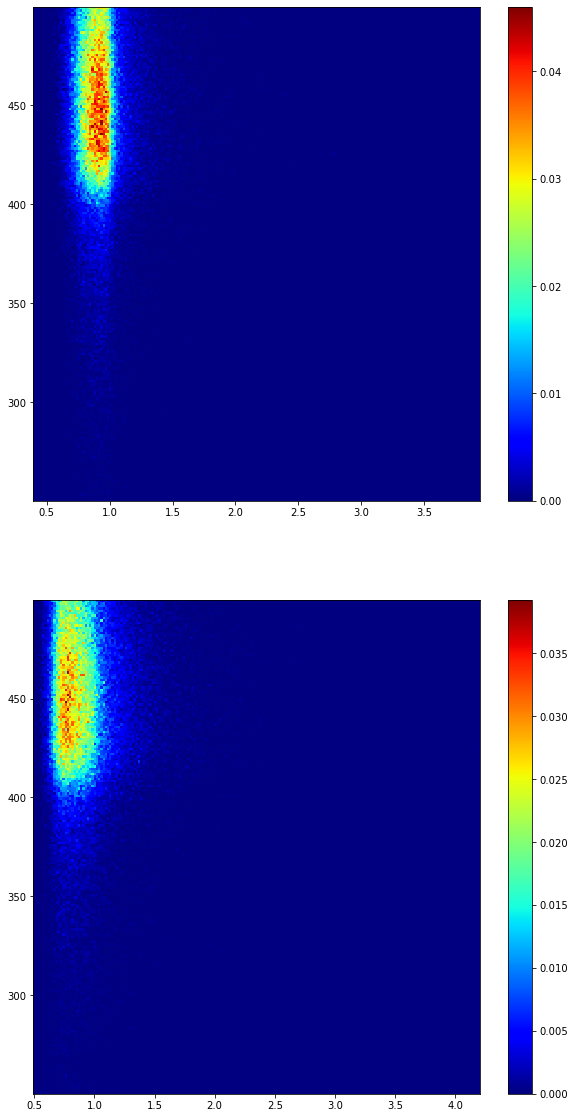

In [75]:
fig, ax = plt.subplots(2, 1, figsize = (10, 20))

p15 = ax[0].hist2d(qcd["t1"], qcd["pt"], bins = 200, density = True, cmap = 'jet')
p16 = ax[1].hist2d(higgs["t1"], qcd["pt"], bins = 200, density = True, cmap = 'jet')

fig.colorbar(p15[3], ax = ax[0])
fig.colorbar(p16[3], ax = ax[1])
plt.show()

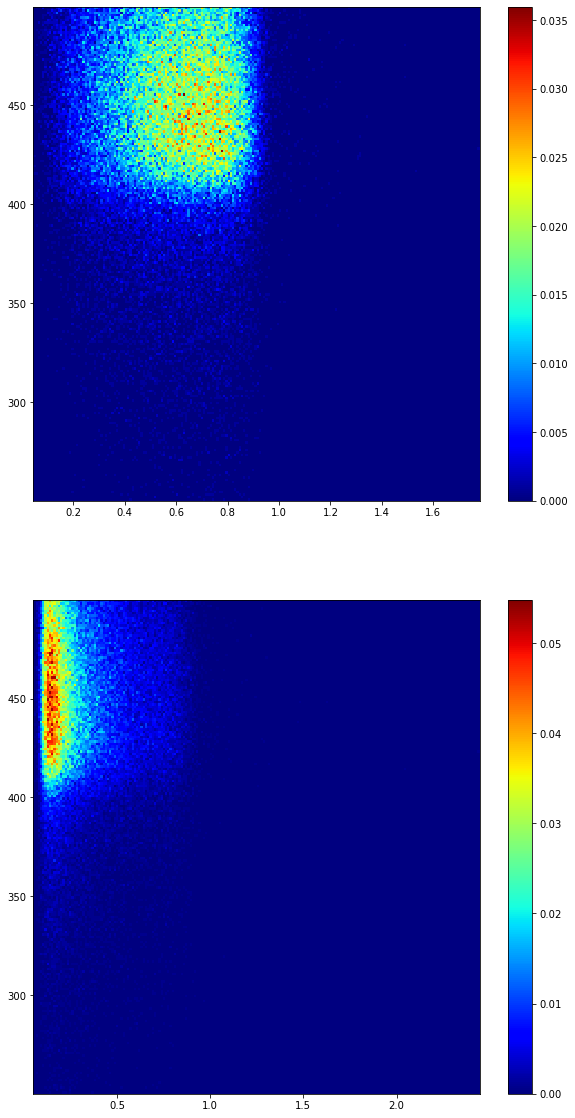

In [76]:
fig, ax = plt.subplots(2, 1, figsize = (10, 20))

p17 = ax[0].hist2d(qcd["t2"], qcd["pt"], bins = 200, density = True, cmap = 'jet')
p18 = ax[1].hist2d(higgs["t2"], qcd["pt"], bins = 200, density = True, cmap = 'jet')

fig.colorbar(p17[3], ax = ax[0])
fig.colorbar(p18[3], ax = ax[1])
plt.show()

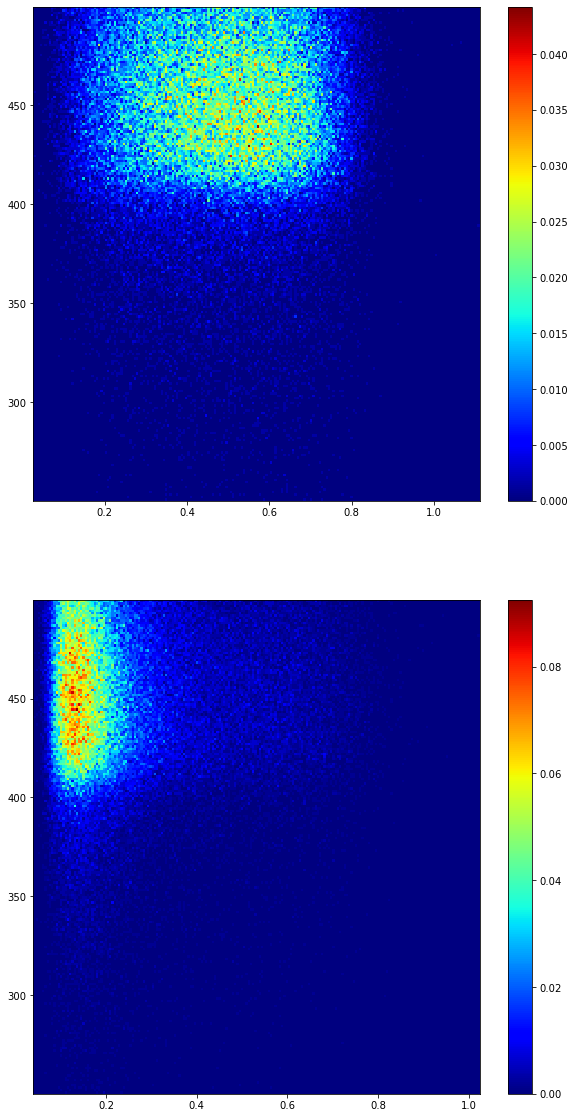

In [77]:
fig, ax = plt.subplots(2, 1, figsize = (10, 20))

p19 = ax[0].hist2d(qcd["t3"], qcd["pt"], bins = 200, density = True, cmap = 'jet')
p20 = ax[1].hist2d(higgs["t3"], qcd["pt"], bins = 200, density = True, cmap = 'jet')

fig.colorbar(p19[3], ax = ax[0])
fig.colorbar(p20[3], ax = ax[1])
plt.show()

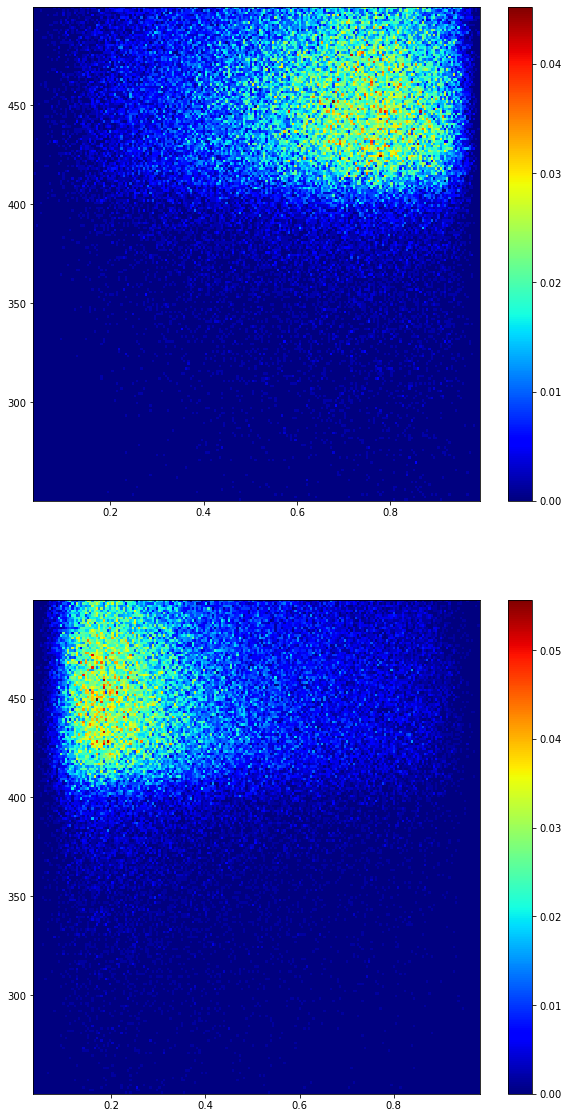

In [78]:
fig, ax = plt.subplots(2, 1, figsize = (10, 20))

p21 = ax[0].hist2d(qcd["t21"], qcd["pt"], bins = 200, density = True, cmap = 'jet')
p22 = ax[1].hist2d(higgs["t21"], qcd["pt"], bins = 200, density = True, cmap = 'jet')

fig.colorbar(p21[3], ax = ax[0])
fig.colorbar(p22[3], ax = ax[1])
plt.show()

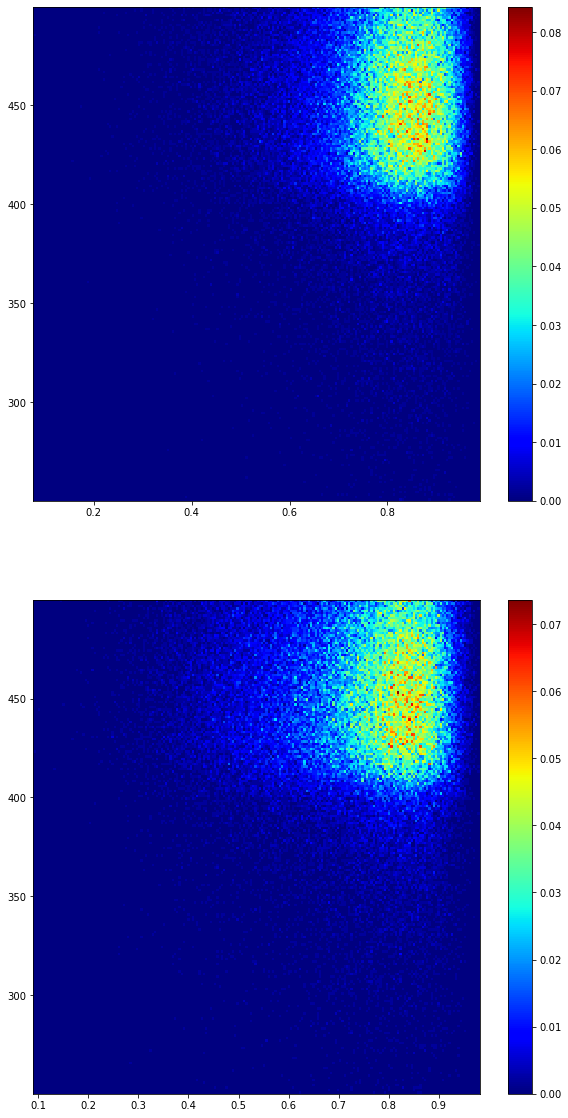

In [79]:
fig, ax = plt.subplots(2, 1, figsize = (10, 20))

p23 = ax[0].hist2d(qcd["t32"], qcd["pt"], bins = 200, density = True, cmap = 'jet')
p24 = ax[1].hist2d(higgs["t32"], qcd["pt"], bins = 200, density = True, cmap = 'jet')

fig.colorbar(p23[3], ax = ax[0])
fig.colorbar(p24[3], ax = ax[1])
plt.show()

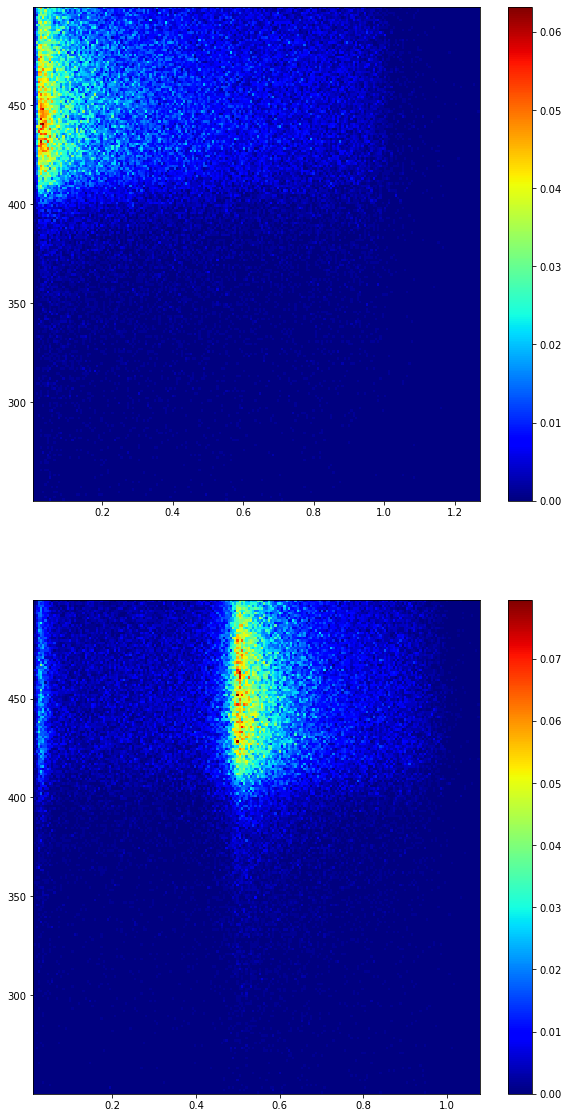

In [81]:
fig, ax = plt.subplots(2, 1, figsize = (10, 20))

p25 = ax[0].hist2d(qcd["KtDeltaR"], qcd["pt"], bins = 200, density = True, cmap = 'jet')
p26 = ax[1].hist2d(higgs["KtDeltaR"], qcd["pt"], bins = 200, density = True, cmap = 'jet')

fig.colorbar(p25[3], ax = ax[0])
fig.colorbar(p26[3], ax = ax[1])
plt.show()